<a href="https://colab.research.google.com/github/VedantChandanCS/Diwali-Sales-Analysis/blob/main/Diwali_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

In [ ]:
# import csv file
df = pd.read_csv('/content/drive/MyDrive/Diwali Sales Data.csv', encoding= 'unicode_escape')

In [ ]:
df.shape

(11251, 15)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [ ]:
#check for null values
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
# drop null values
df.dropna(inplace=True)

In [ ]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

# Gender


<ipython-input-15-903d22ee49c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Gender',data = df, palette=palette)


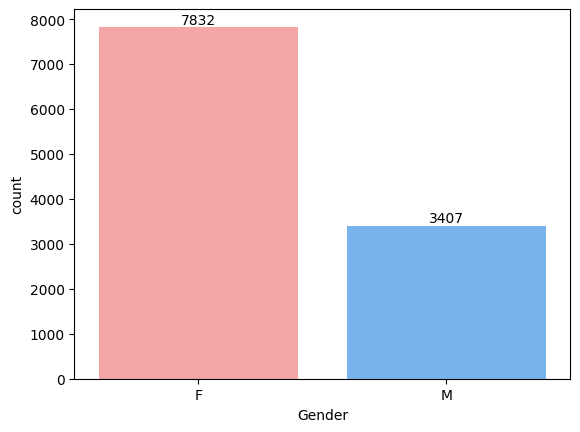

In [ ]:
# plotting a bar chart for Gender and it's count

palette = ['#FF9999', '#66B3FF']
ax = sns.countplot(x = 'Gender',data = df, palette=palette)

for bars in ax.containers:
    ax.bar_label(bars)

<ipython-input-16-46ba2b35854c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, palette=palette)


<Axes: xlabel='Gender', ylabel='Amount'>

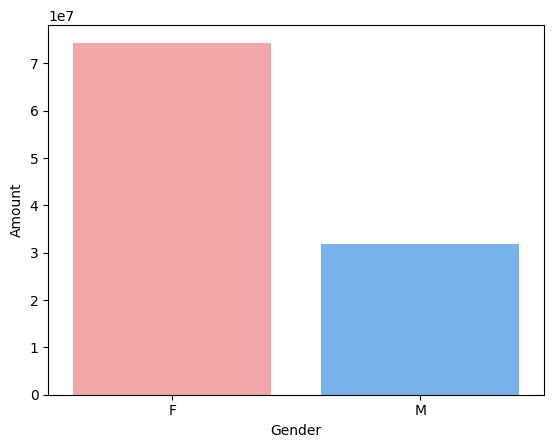

In [ ]:
# plotting a bar chart for gender vs total amount

palette = ['#FF9999', '#66B3FF']
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, palette=palette)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

# Age

<ipython-input-17-11ae5771d9fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette=palette)
<ipython-input-17-11ae5771d9fd>:5: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette=palette)


<Axes: xlabel='Age Group', ylabel='Amount'>

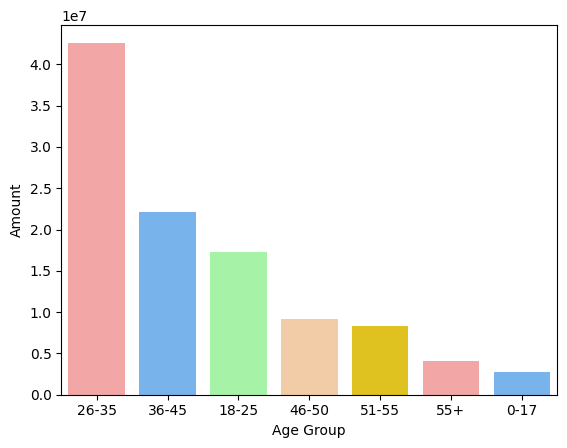

In [ ]:
# Total Amount vs Age Group
palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette=palette)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

# States

<ipython-input-18-4ae9ce98db9d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State', y= 'Orders', palette=palette)
<ipython-input-18-4ae9ce98db9d>:11: UserWarning: 
The palette list has fewer values (15) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = sales_state, x = 'State', y= 'Orders', palette=palette)


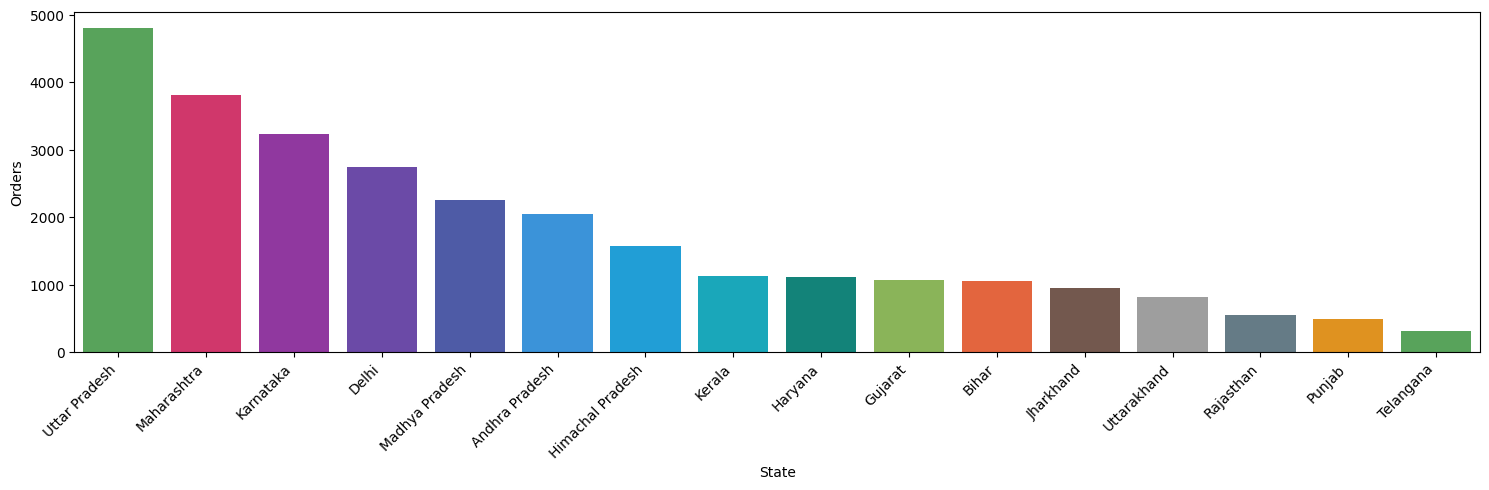

In [ ]:
# total number of orders from top 10 states
# Set the color palette with more colors for all states
palette=(["#4CAF50", "#E91E63", "#9C27B0", "#673AB7", "#3F51B5", "#2196F3", "#03A9F4", "#00BCD4", "#009688", "#8BC34A",
         "#FF5722", "#795548", "#9E9E9E", "#607D8B", "#FF9800"])

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data = sales_state, x = 'State', y= 'Orders', palette=palette)

# Rotate x-axis labels (state names)
plt.xticks(rotation=45, ha='right')  # you can adjust rotation angle (45) as needed

# Adjust layout to prevent label cutoff
plt.tight_layout()

<ipython-input-19-8fc19cdb0057>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State',y= 'Amount',palette=palette)


<Axes: xlabel='State', ylabel='Amount'>

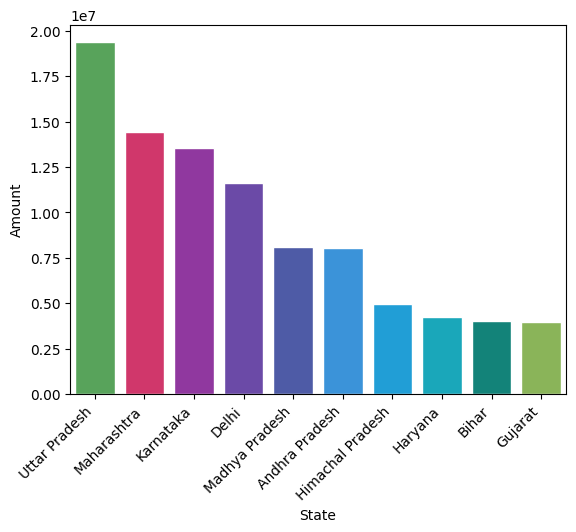

In [ ]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

palette=(["#4CAF50", "#E91E63", "#9C27B0", "#673AB7", "#3F51B5", "#2196F3", "#03A9F4", "#00BCD4", "#009688", "#8BC34A",
         ])
# Rotate x-axis labels (state names)
plt.xticks(rotation=45, ha='right')  # you can adjust rotation angle (45) as needed

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',palette=palette)

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively


# Marital Status

<ipython-input-21-bd34e9c35c0e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Marital_Status', palette=palette)


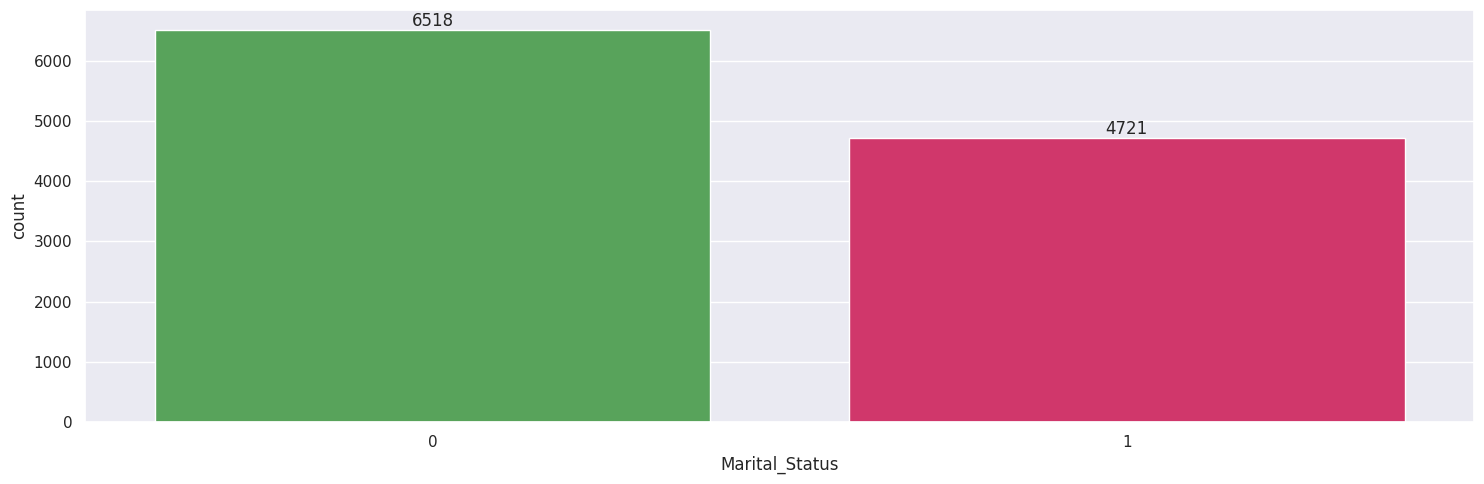

In [ ]:
# Set the color palette for the bars
palette = ["#4CAF50", "#E91E63"]

# Create the countplot with the custom palette
ax = sns.countplot(data=df, x='Marital_Status', palette=palette)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Add value labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

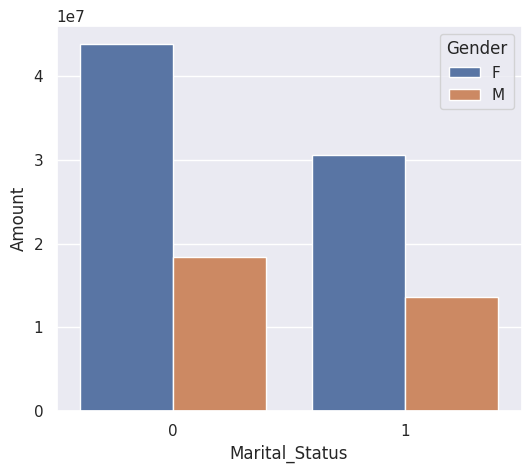

In [ ]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

# Occupation

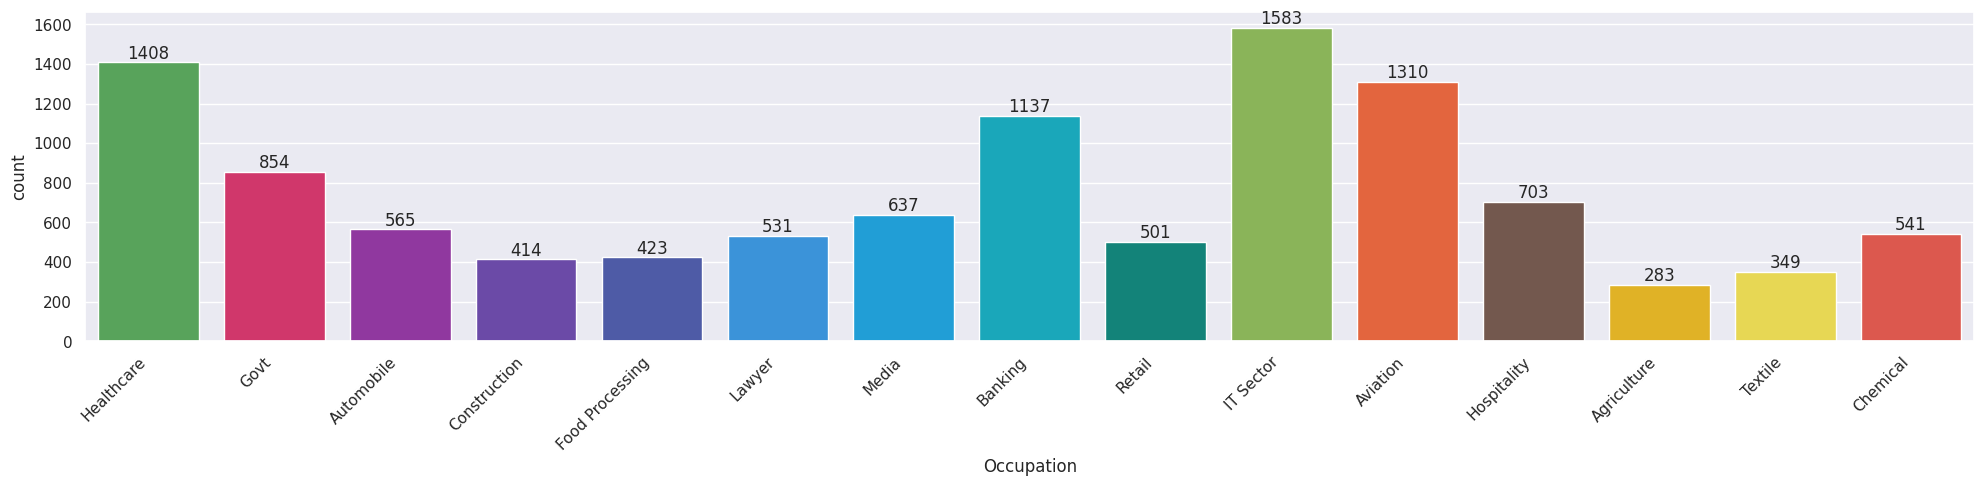

In [ ]:
# Set the figure size
sns.set(rc={'figure.figsize':(20,5)})

# Create the countplot with occupations on the x-axis and custom colors
palette = ["#4CAF50", "#E91E63", "#9C27B0", "#673AB7", "#3F51B5", "#2196F3", "#03A9F4", "#00BCD4", "#009688", "#8BC34A", "#FF5722", "#795548", "#FFC107", "#FFEB3B","#F44336"]
ax = sns.countplot(data=df, x='Occupation', hue='Occupation', palette=palette, legend=False)

# Rotate the x-axis labels 45 degrees
plt.xticks(rotation=45, ha='right')

# Add value labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

<ipython-input-31-f6deb23ca904>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_state, x='Occupation', y='Amount', palette=palette)


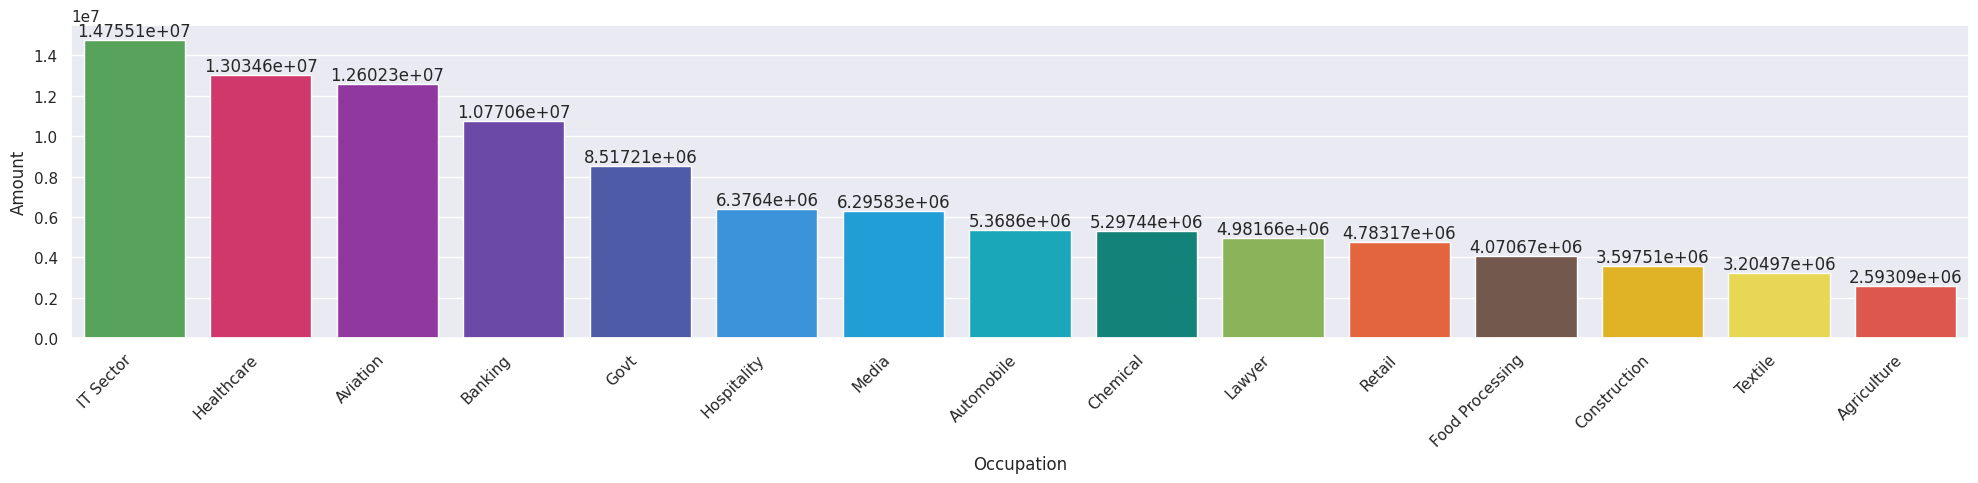

In [ ]:
# Set the figure size
sns.set(rc={'figure.figsize':(20,5)})

# Create the barplot with occupations on the x-axis and custom colors
palette = ["#4CAF50", "#E91E63", "#9C27B0", "#673AB7", "#3F51B5", "#2196F3", "#03A9F4", "#00BCD4", "#009688", "#8BC34A", "#FF5722", "#795548", "#FFC107", "#FFEB3B", "#F44336"]
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(data=sales_state, x='Occupation', y='Amount', palette=palette)

# Rotate the x-axis labels 45 degrees
plt.xticks(rotation=45, ha='right')

# Add value labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector



# Product Category

<ipython-input-37-f406d2958e31>:6: UserWarning: 
The palette list has fewer values (15) than needed (18) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=df, x='Product_Category', hue='Product_Category', palette=palette, legend=False)


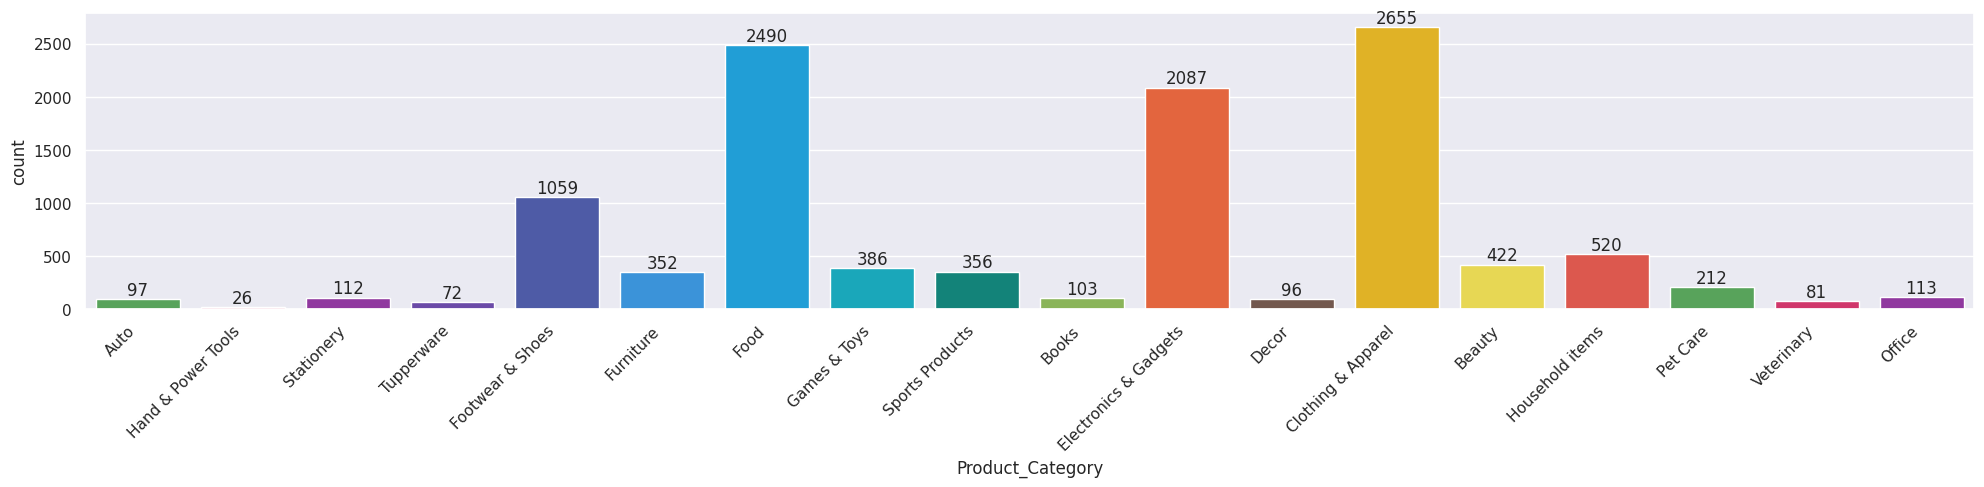

In [ ]:
# Set the figure size
sns.set(rc={'figure.figsize':(20,5)})

# Create the countplot with Product_Category on the x-axis and custom colors
palette = ["#4CAF50", "#E91E63", "#9C27B0", "#673AB7", "#3F51B5", "#2196F3", "#03A9F4", "#00BCD4", "#009688", "#8BC34A", "#FF5722", "#795548", "#FFC107", "#FFEB3B","#F44336"]
ax = sns.countplot(data=df, x='Product_Category', hue='Product_Category', palette=palette, legend=False)

# Rotate the x-axis labels 45 degrees
plt.xticks(rotation=45, ha='right')

# Add value labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

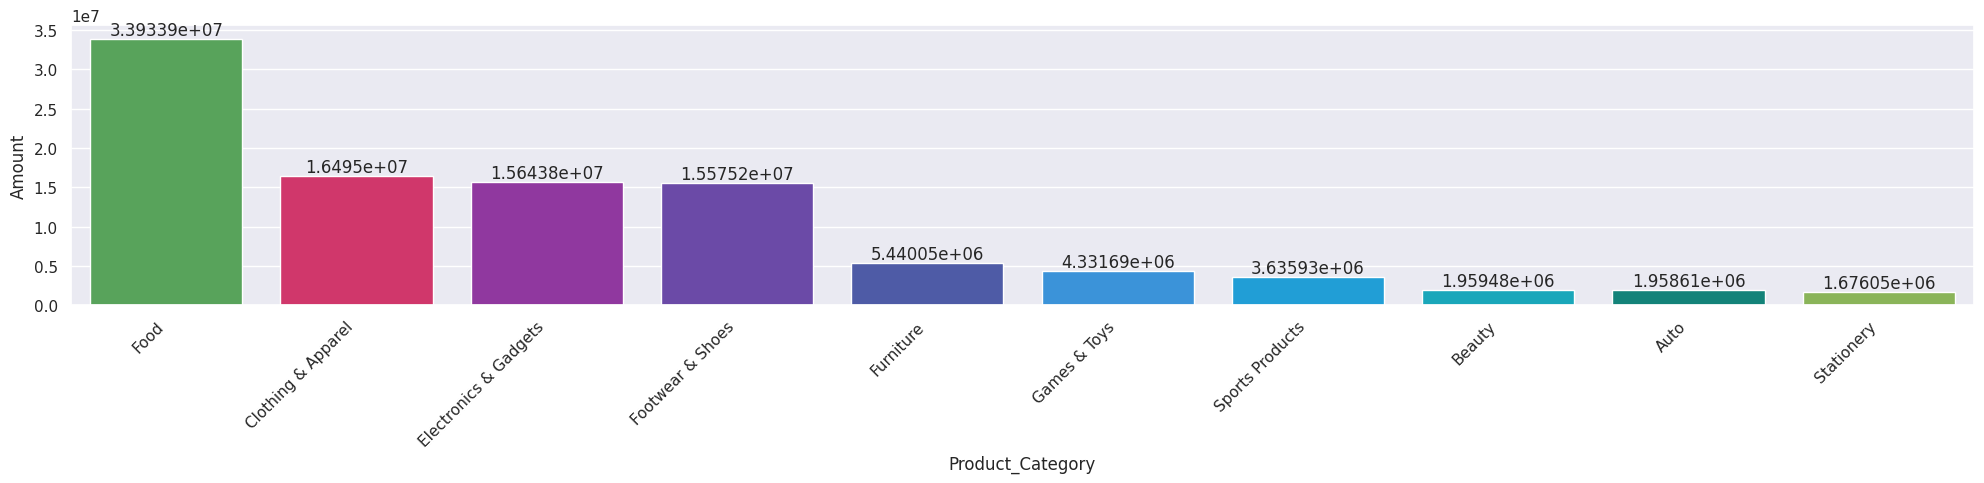

In [ ]:
# Get top 10 product categories by total sales
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

# Set figure size
sns.set(rc={'figure.figsize':(20,5)})

# Create the barplot with custom colors
palette = ["#4CAF50", "#E91E63", "#9C27B0", "#673AB7", "#3F51B5", "#2196F3", "#03A9F4", "#00BCD4", "#009688", "#8BC34A"]
ax = sns.barplot(data=sales_state, x='Product_Category', y='Amount', palette=palette, hue='Product_Category', legend=False)

# Rotate the x-axis labels 45 degrees
plt.xticks(rotation=45, ha='right')

# Add value labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

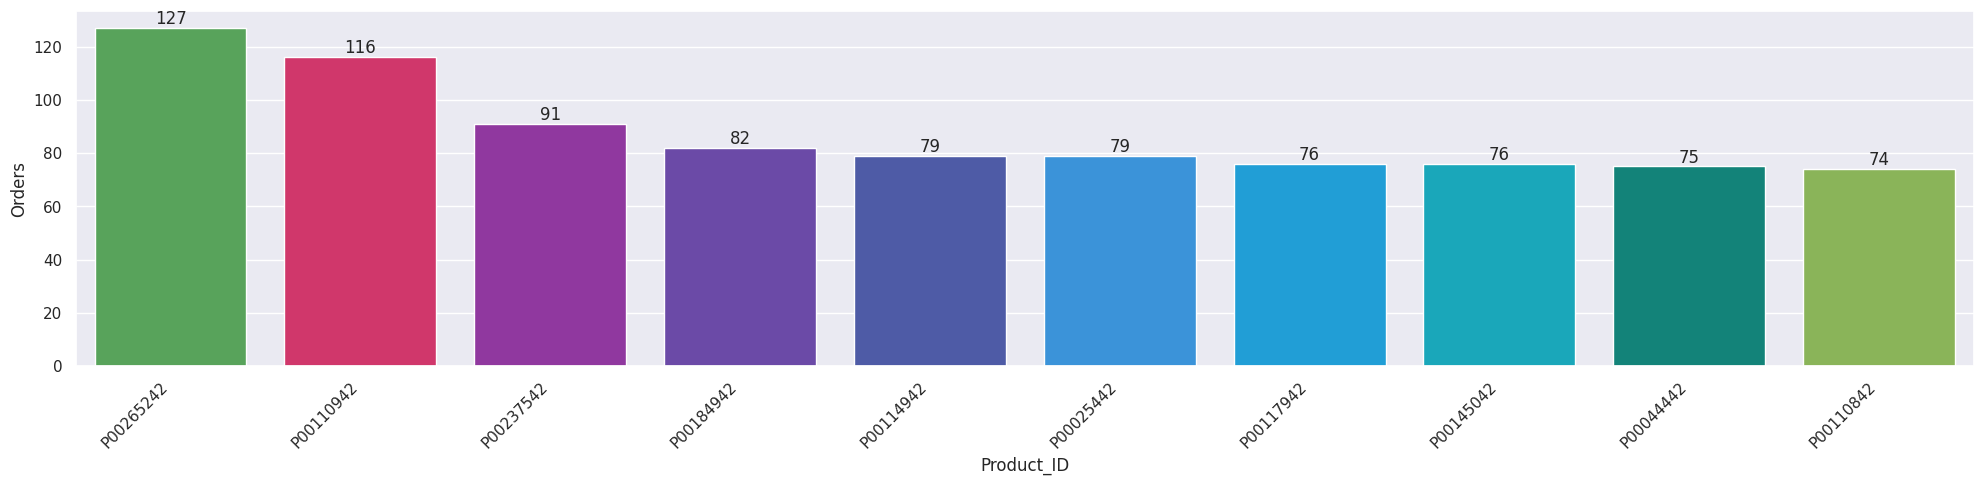

In [ ]:
# Get top 10 product IDs by total orders
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

# Set figure size
sns.set(rc={'figure.figsize':(20,5)})

# Create the barplot with custom colors
palette = ["#4CAF50", "#E91E63", "#9C27B0", "#673AB7", "#3F51B5", "#2196F3", "#03A9F4", "#00BCD4", "#009688", "#8BC34A"]
ax = sns.barplot(data=sales_state, x='Product_ID', y='Orders', palette=palette, hue='Product_ID', legend=False)

# Rotate the x-axis labels 45 degrees
plt.xticks(rotation=45, ha='right')

# Add value labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

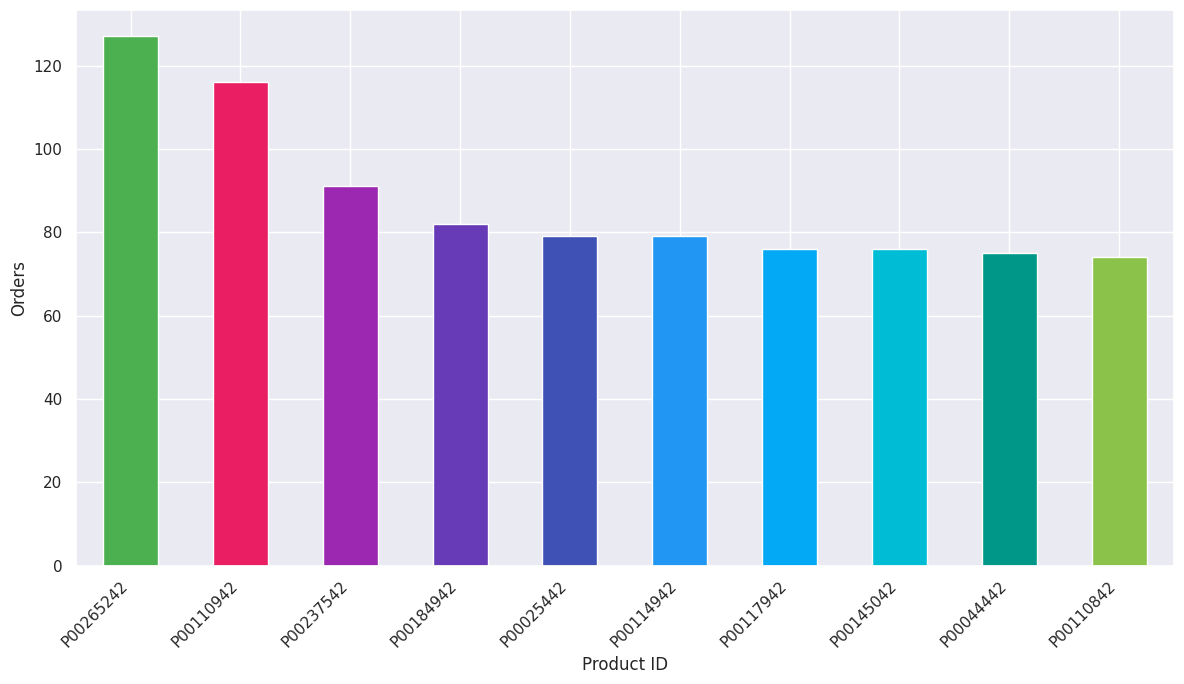

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7))
product_orders = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False)

colors = ['#4CAF50', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#03A9F4', '#00BCD4', '#009688', '#8BC34A']
product_orders.plot(kind='bar', color=colors, ax=ax)

plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Product ID')
ax.set_ylabel('Orders')
plt.tight_layout()

**Conclusion:**
*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*
